In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dt_xl=pd.read_excel("dataone.xlsx")

In [3]:
dt_xl

,Viscocity,Permeability,Anisotropy,oil Saturation,Porosity,injecton rate,production rate
0,10.0,100.0,0.10,0.4,0.20,212.0,22
1,10.0,120.0,0.12,0.3,0.15,200.0,138
2,11.0,110.0,0.20,0.4,0.12,202.0,109
3,10.0,140.0,0.10,0.3,0.13,188.0,111
4,10.0,150.0,0.10,0.4,0.17,337.0,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,


In [4]:
dataset=dt_xl.iloc[:4,:]
dataset

,Viscocity,Permeability,Anisotropy,oil Saturation,Porosity,injecton rate,production rate
0,10.0,100.0,0.10,0.4,0.20,212.0,22
1,10.0,120.0,0.12,0.3,0.15,200.0,138
2,11.0,110.0,0.20,0.4,0.12,202.0,109
3,10.0,140.0,0.10,0.3,0.13,188.0,111


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Viscocity        4 non-null      float64
 1   Permeability     4 non-null      float64
 2   Anisotropy       4 non-null      float64
 3   oil Saturation   4 non-null      float64
 4   Porosity         4 non-null      float64
 5   injecton rate    4 non-null      float64
 6   production rate  4 non-null      object 
dtypes: float64(6), object(1)
memory usage: 272.0+ bytes


In [6]:
dataset["production rate"]=dataset["production rate"].astype(float)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Viscocity        4 non-null      float64
 1   Permeability     4 non-null      float64
 2   Anisotropy       4 non-null      float64
 3   oil Saturation   4 non-null      float64
 4   Porosity         4 non-null      float64
 5   injecton rate    4 non-null      float64
 6   production rate  4 non-null      float64
dtypes: float64(7)
memory usage: 288.0 bytes


<ipython-input-6-70b7b695a045>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["production rate"]=dataset["production rate"].astype(float)


In [7]:
dataset

,Viscocity,Permeability,Anisotropy,oil Saturation,Porosity,injecton rate,production rate
0,10.0,100.0,0.10,0.4,0.20,212.0,22.0
1,10.0,120.0,0.12,0.3,0.15,200.0,138.0
2,11.0,110.0,0.20,0.4,0.12,202.0,109.0
3,10.0,140.0,0.10,0.3,0.13,188.0,111.0


<AxesSubplot:>

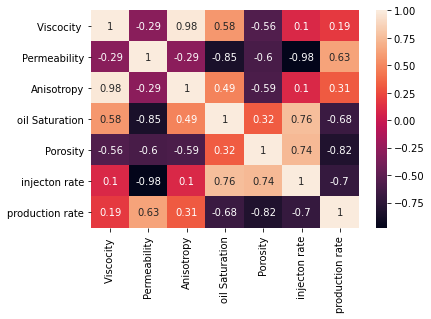

In [8]:
sns.heatmap(dataset.corr(),annot=True,)

In [9]:
x=dataset.iloc[:,:6].values
y=dataset.iloc[:,6].values


In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=200,test_size=0.2)

In [11]:
x_train.shape

(3, 6)

In [12]:
x_test.shape

(1, 6)

In [13]:
y_train.shape

(3,)

In [14]:
y_test.shape

(1,)

In [15]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [17]:
y_predict=model.predict([[10,150,0.1,0.4,0.17,337]])
y_predict

array([-754.07086932])

In [ ]:
import pickle
pickle.dump(model,open('model.pkl','wb'))

In [ ]:
3